## Michaelis-Menten kinetics
$$
\begin{aligned}
    S + E  &\xrightarrow{k_p} C \\
    C  &\xrightarrow{k_m} S + E \\
     C &\xrightarrow{k_2} P + E
\end{aligned}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci
import scipy.integrate as integrate
import scipy.stats as stats

### Parameters and initial coditions

In [2]:
kp = 1.1
km = 0.1
k2 = 0.8
S0=100
E0 =100
C0=1
P0=1

#set the duration to be 10 seconds
t_end= 10

### Gillespie algorithm

In [48]:
t_sample = 0.0001*max(1/kp , 1/km , 1/k2  )

In [49]:
def R_Gillespie(kp, km , k2 ,S0, E0 , C0 , P0) :
    
    #initial setting
    S = S0
    E = E0
    C = C0 
    P = P0
 
    t_array = np.zeros(int( t_end/t_sample) +1 )
    S_array = np.zeros( int(t_end/t_sample) +1)
    E_array = np.zeros( int(t_end/t_sample) +1)
    C_array = np.zeros( int(t_end/t_sample) +1)
    P_array = np.zeros( int(t_end/t_sample) +1)    
    
    j=0
    t=0
    t_array[j] = 0
    S_array[j] = S
    E_array[j] = E
    C_array[j] = C
    P_array[j] = P
    while t < t_end :
        
        a = [kp*S*E , km*C , k2*C ]
        a0 = sum(a)
        
        # no reaction , all quantity remain constant
        if a0 == 0 :
            t = t + t_sample
            
        if a0 != 0 :
            r1 , r2 = np.random.rand(2)
    
            while r1 ==0:
                r1 = np.random.rand()

            t_next = (1/a0)*(  np.log(1/r1))  
            t = t + t_next

            i = 0
            mu = 0
            amu = 0 
            while amu < r2*a0 : 
                mu = mu + 1
                amu = amu + a[i]
                i = i+1

            if mu == 1:
                S = S-1
                E = E-1
                C = C+1
            elif mu ==2 :
                S = S +1
                E = E +1
                C = C - 1
            else :
                C = C - 1
                P = P + 1
                E = E + 1

            if t > t_end:
                print('done')
                break
        
        while t > j*t_sample and j < int( t_end/t_sample) : 
            j = j+1
            t_array[j] = j*t_sample
            S_array[j] = S
            E_array[j] = E
            C_array[j] = C
            P_array[j] = P
            
            print(j)

    return  t_array , S_array , E_array , C_array  , P_array  

In [ ]:
t_Gillespie_array , S_Gillespie_array , E_Gillespie_array , C_Gillespie_array  , P_Gillespie_array = R_Gillespie(kp, km , k2 ,S0, E0 , C0 , P0)

### Euler method
Applying Euler method to the Langvin equation:
$$
\begin{align*}
\Delta X_S(t_i) &= 
- \big(k_p X_S(t_i)X_E(t_i) + k_m X_C(t_i) \big) \Delta t + \big(-\sqrt{ k_p X_S(t_i) X_E(t_i) } \; \big) \Delta W_1(t_i) + \sqrt{k_m X_C(t_i)} \Delta W_2(t_i) \\
\Delta X_E(t_i) &= 
- \big(k_p X_S(t_i)X_E(t_i) + (k_m + k_2) X_C(t_i) \big) \Delta t + \big(-\sqrt{ k_p X_S(t_i) X_E(t_i) } \; \big) \Delta W_1(t_i) + \sqrt{k_m X_C(t_i)} \Delta W_2(t_i) + \sqrt{k_2 X_C(t_i)} \Delta W_3(t_i)
\\
\Delta X_C(t_i) &= - \Delta X_E(t_i) 
\\
\Delta X_P(t_i) &= 
k_2 X_C(t_i) \Delta t + \sqrt{k_2 X_C(t_i)} \Delta W_3(t_i)
\\
\end{align*}
$$

In [10]:
#set Δt
step_size = 0.001

In [8]:
def R_Euler(kp, km , k2 ,S0, E0 , C0 , P0):
    
    #initial setting
    t_array = np.zeros( int(t_end/step_size) +1 )
    S_array = np.zeros( int(t_end/step_size) +1 )
    E_array = np.zeros( int(t_end/step_size) +1 )
    C_array = np.zeros( int(t_end/step_size) +1 )
    P_array = np.zeros( int(t_end/step_size) +1 )    
    t=0
    j=0
    S = S0
    E = E0
    C = C0
    P = P0
    t_array[j] = 0
    S_array[j] = S0
    E_array[j] = E0
    C_array[j] = C0
    P_array[j] = P0
    
    #start the process
    while j < t_end/step_size  :
        print(j , t,S,E,C,P)
        j= j+1
        Wp  , Wm , W2 = np.random.normal(0,step_size**2,3)
        dS = (-kp*S*E + km *C)*step_size + ( -np.sqrt(kp*S*E)*Wp + np.sqrt(km*C)*Wm )
        dE = (-kp*S*E + km *C + k2*C)*step_size + ( -np.sqrt(kp*S*E)*Wp + np.sqrt(km*C)*Wm + np.sqrt(k2*C)*W2)
        dC = -dE
        dP = k2*C*step_size+ np.sqrt(k2*C)*W2
        
        S = max (S + dS , 0 )
        E = max (E + dE , 0)
        C = max(C + dC , 0)
        P = max(P + dP , 0)
        
        t = t + step_size
       
        t_array[j] = t
        S_array[j] = S
        E_array[j] = E
        C_array[j] = C
        P_array[j] = P
        
    return t_array , S_array , E_array , C_array  , P_array 

In [ ]:
 t_Euler_array , S_Euler_array , E_Euler_array , C_Euler_array  , P_Euler_array  = R_Euler(kp, km , k2 ,S0, E0 , C0 , P0)

### Tau-leaping method
Given $\varepsilon>0$ , choose a leaping time $\tau$ which depends on current state by :
$$
\tau = \min ( \frac{\varepsilon a_0}{ \lvert k_p \xi_S X_E + k_p \xi_E X_S\rvert }  \; , \;
\frac{\varepsilon a_0}{ \lvert k_m \xi_C  \rvert  } \; , \; \frac{\varepsilon a_0}{ \lvert k_2 \xi_C  \rvert  }
)
$$

where $a_0 = k_p X_S X_E + k_m X_C + k_2 X_C $ , $\xi_S = -k_p X_S X_E + k_m X_C$ , $\xi_E = -k_p X_S X_E + ( k_m + k_2 ) X_C$
, $\xi_C = - \xi_E $ and $\xi_P = k_2 X_C$

In [11]:
epsilon1=0.1
epsilon2=0.001
# choose the leaping time tau
def Tau_choose(epsilon , kp, km , k2 , S,E,C,P):
    a = [kp*S*E , km*C , k2*C ]
    a0 = sum(a)
    xi_S = -kp*S*E + km*C
    xi_E = -kp*S*E + km*C + k2*C
    xi_C =  kp*S*E -km*C  - k2*C
    xi_P =  k2*C
    tp = epsilon*a0 / abs( xi_S*kp*E + xi_E*kp*S)
    tm = epsilon*a0 / abs( xi_C*km)
    t2 = epsilon*a0 / abs( xi_C*k2)
    return min(tp,tm,t2)

In [12]:
def R_Tau(epsilon , kp, km , k2 , S0 , E0 , C0 , P0 ):
    t_array = np.array( [] )
    S_array = np.array( [] )
    E_array = np.array( [] )
    C_array = np.array( [] )
    P_array = np.array( [] )    
    
    t=0
    S = S0
    E = E0
    C = C0
    P = P0
    t_array = np.append(t_array ,  t)
    S_array = np.append( S_array , S )
    E_array = np.append( E_array , E )
    C_array = np.append( C_array , C )
    P_array = np.append( P_array , P )
    while t < t_end:
        print(t)
        
        if C > 0 or S > 0:
            T = Tau_choose(epsilon , kp, km , k2 , S,E,C,P)
            dp = np.random.poisson( kp*S*E*T )
            dm = np.random.poisson( km*C*T )
            d2 = np.random.poisson( k2*C*T )
            S = max (S - dp + dm  , 0 )
            E = max (E - dp + dm  + d2 , 0)
            C = max (C + dp - dm - d2 , 0)
            P = max ( P + d2 , 0)
            t = t+T
            t_array = np.append( t_array ,  t)
            S_array = np.append( S_array , S )
            E_array = np.append( E_array , E )
            C_array = np.append( C_array , C )
            P_array = np.append( P_array , P )
        
        #all process stop , all quantities remain constant
        else :
            t=t+0.01
            t_array = np.append(t_array ,  t)
            S_array = np.append( S_array , S_array[-1] )
            E_array = np.append( E_array , E_array[-1] )
            C_array = np.append( C_array , C_array[-1] )
            P_array = np.append( P_array , P_array[-1] )
    return t_array , S_array , E_array , C_array  , P_array 

In [ ]:
# Tau1 corresponds to epsilon1 and Tau2 corresponds to epsilon2
t_Tau1_array , S_Tau1_array , E_Tau1_array , C_Tau1_array  , P_Tau1_array =R_Tau(epsilon1, kp, km , k2 , S0 , E0 , C0 , P0 )
t_Tau2_array , S_Tau2_array , E_Tau2_array , C_Tau2_array  , P_Tau2_array =R_Tau(epsilon2, kp, km , k2 , S0 , E0 , C0 , P0 )

### Two time scale stochastic simulation

In [45]:
def R_Nest(kp,km,k2,S0,E0,C0,P0):
    S = S0
    E = E0
    C = C0 
    P = P0
 
    t_array =  np.array( [])
    S_array =  np.array( [])
    E_array =  np.array( [])
    C_array =  np.array( [])
    P_array =  np.array( [])  
    t=0
    t_array = np.append( t_array , t)
    S_array = np.append( S_array , S )
    E_array = np.append( E_array , E )
    C_array = np.append( C_array , C )
    P_array = np.append( P_array , P )
    
    #run-time for quasi-equilibrium
    Tf = 0.02
    
    while t < t_end : 
        
        # if in the absorbing states , all process stop 
        if S==0 and C ==0 :
            t =t+0.1
           
        else :
            tf = 0
            am = 0
            j = 0
            while tf<Tf :  # Inner SSA for fast reaction
                j = j+1
                a = [kp*S*E, k2*C]
                a0 = sum(a)

                r1 = np.random.rand()
                while r1 == 0:
                    r1 = np.random.rand()
                tau = (1/a0)*(np.log(1/r1))
                tf = tf + tau

                i=0
                mu=0
                amu=0
                r2=np.random.rand()

                while amu < r2*a0:
                    mu = mu + 1
                    amu = amu + a[i]
                    i = i + 1
                C_old = C
                if mu == 1:      
                    S = S - 1
                    E = E - 1
                    C = C + 1
                elif mu == 2 :
                    C = C - 1
                    P = P + 1
                    E = E + 1
                am = am + (C + C_old)/2*tau
            print(j)
            # Outer SSA for slow reaction
            
            #no slow reaction if C = 0
            if C == 0 :
                continue
            C_avg = am/ tf #approximated quasi-equilibrium expected value of  C  
            a = k2*C_avg

            r3 = np.random.rand()
            while r3 == 0 :
                r3 = np.random.rand()

            tau = (1/a)*( np.log(1/r3) )
            t = t + tau
            C = C - 1
            S = S + 1
            E = E + 1

        t_array = np.append( t_array , t)
        S_array = np.append( S_array , S )
        E_array = np.append( E_array , E )
        C_array = np.append( C_array , C )
        P_array = np.append( P_array , P )
    return t_array , S_array , E_array , C_array , P_array

In [ ]:
t_Nest_array , S_Nest_array , E_Nest_array , C_Nest_array , P_Nest_array = R_Nest(kp,km,k2,S0,E0,C0,P0)

### Deterministic equation

In [80]:
t_det = np.arange(0,10,0.001)
def R_deterministic(kp,km,k2,S0,E0,C0,P0):
    def f(v ,t):
        S,E,C,P = v
        return -kp*S*E + km*C , -kp*S*E + (km+k2)*C , kp*S*E - (km + k2)*C , k2*C
    return integrate.odeint( f , ( S0, E0 , C0 , P0) , t_det)

In [81]:
R_det = R_deterministic(kp,km,k2,S0,E0,C0,P0)

In [82]:
R_det

array([[1.00000000e+02, 1.00000000e+02, 1.00000000e+00, 1.00000000e+00],
       [9.00904867e+01, 9.00953870e+01, 1.09046130e+01, 1.00490024e+00],
       [8.19680267e+01, 8.19849975e+01, 1.90150025e+01, 1.01697081e+00],
       ...,
       [3.17438916e-05, 1.00965001e+02, 3.49990916e-02, 1.01964969e+02],
       [3.17186629e-05, 1.00965029e+02, 3.49711288e-02, 1.01964997e+02],
       [3.16934577e-05, 1.00965057e+02, 3.49431883e-02, 1.01965025e+02]])

## Compare all results

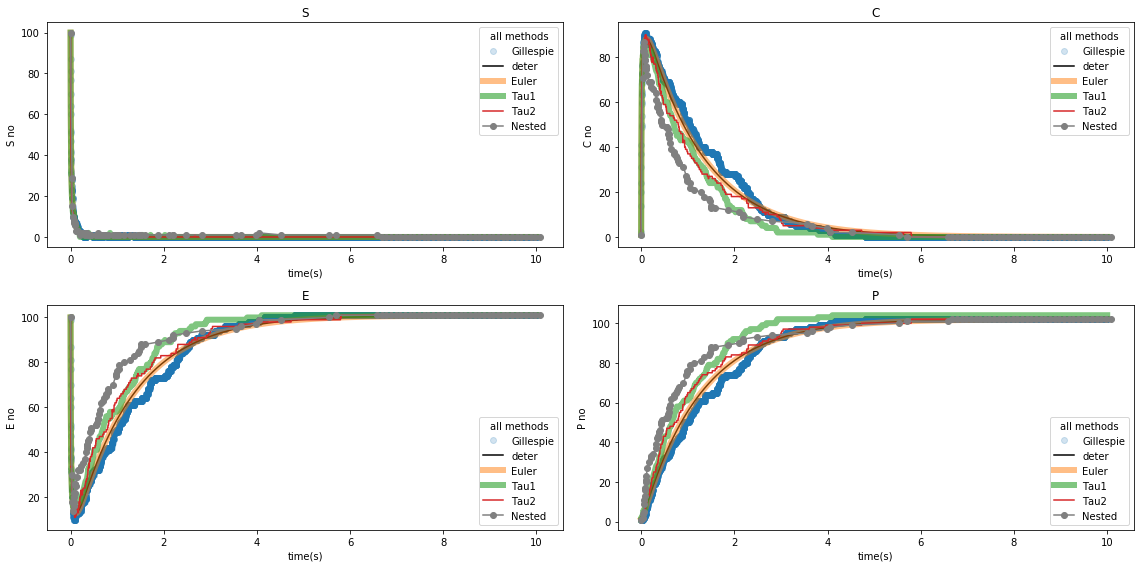

In [109]:
# plot the results

fig , ax = plt.subplots(2,2 ,  figsize=(16,8))

ax[0,0].set_title("S")
ax[0,0].set_xlabel('time(s)')
ax[0,0].set_ylabel('S no')


ax[0,0].plot( t_Gillespie_array , S_Gillespie_array  , 'o', label = "Gillespie" , alpha = 0.2)
ax[0,0].plot(t_det ,  R_det[:,0] , color = 'k' ,label = "deter"  )
ax[0,0].plot( t_Euler_array ,S_Euler_array ,  label = "Euler" , linewidth = 6 , alpha = 0.5)
ax[0,0].plot( t_Tau1_array , S_Tau1_array , label = "Tau1" , linewidth = 6 , alpha = 0.6)
ax[0,0].plot( t_Tau2_array , S_Tau2_array , label = "Tau2"  )
ax[0,0].plot( t_Nest_array , S_Nest_array  , color = 'grey', marker ='o', label = "Nested"  )
ax[0,0].legend(title = "all methods")


ax[1,0].set_title("E")
ax[1,0].set_xlabel('time(s)')
ax[1,0].set_ylabel('E no')

ax[1,0].plot( t_Gillespie_array , E_Gillespie_array  , 'o', label = "Gillespie" , alpha = 0.2)
ax[1,0].plot(t_det ,  R_det[:,1] , color = 'k' ,label = "deter" )
ax[1,0].plot( t_Euler_array ,E_Euler_array ,  label = "Euler" , linewidth = 6 , alpha = 0.5)
ax[1,0].plot( t_Tau1_array , E_Tau1_array , label = "Tau1" , linewidth = 6 , alpha = 0.6)
ax[1,0].plot( t_Tau2_array , E_Tau2_array , label = "Tau2"  )
ax[1,0].plot( t_Nest_array , E_Nest_array  , color = 'grey', marker ='o', label = "Nested" )
ax[1,0].legend(title = "all methods")


ax[0,1].set_title("C")
ax[0,1].set_xlabel('time(s)')
ax[0,1].set_ylabel('C no')

ax[0,1].plot( t_Gillespie_array , C_Gillespie_array  , 'o', label = "Gillespie" , alpha = 0.2)
ax[0,1].plot(t_det ,  R_det[:,2] , color = 'k' ,label = "deter" )
ax[0,1].plot( t_Euler_array ,C_Euler_array ,  label = "Euler" , linewidth = 6 , alpha = 0.5)
ax[0,1].plot( t_Tau1_array , C_Tau1_array , label = "Tau1" , linewidth = 6 , alpha = 0.6)
ax[0,1].plot( t_Tau2_array , C_Tau2_array , label = "Tau2"  )
ax[0,1].plot( t_Nest_array , C_Nest_array  , color = 'grey', marker ='o', label = "Nested"  )
ax[0,1].legend(title = "all methods")


ax[1,1].set_title("P")
ax[1,1].set_xlabel('time(s)')
ax[1,1].set_ylabel('P no')

ax[1,1].plot( t_Gillespie_array , P_Gillespie_array  , 'o', label = "Gillespie" , alpha = 0.2)
ax[1,1].plot(t_det ,  R_det[:,3] , color = 'k' ,label = "deter" )
ax[1,1].plot( t_Euler_array ,P_Euler_array ,  label = "Euler" , linewidth = 6 , alpha = 0.5)
ax[1,1].plot( t_Tau1_array , P_Tau1_array , label = "Tau1" , linewidth = 6 , alpha = 0.6)
ax[1,1].plot( t_Tau2_array , P_Tau2_array , label = "Tau2"  )
ax[1,1].plot( t_Nest_array , P_Nest_array  , color = 'grey', marker ='o', label = "Nested"  )
ax[1,1].legend(title = "all methods")

plt.tight_layout()